# FISHscale single dataset tutorial

# Imports

In [1]:
#Get data path
import os
cur_path = os.path.dirname(os.getcwd())
parent_folder = os.path.split(cur_path)[0]

#Import FISHscale
import sys
sys.path.insert(0, parent_folder)
from FISHscale.utils import dataset

#Import other libraries
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.collections import LineCollection
import numpy as np
import pickle
import os

#Get data path
cur_path = os.path.dirname(os.getcwd())
data_path = os.path.join(cur_path, 'Example_data')

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


INFO - 2021-12-02 14:27:38,094 - io - WRITING LOG OUTPUT TO /home/lars/.cellpose/run.log


# Load data
Data can be loaded from .csv or .parquet files, where .parquet files are the most efficient. These files should at least have a column for the X and Y coordinates of the points and a colum with gene names. The names of these columns can be passed to the loading function with the parameters: `x_label`, `y_label` & `gene_label`. Other colums can be loaded using the `other_columns` parameter.  

  
The unit is also handled explicitly by giving the unit scale using the `pixel_size` parameter. For our data the XY coordinates are in pixel units which are 0.18 micrometer. Change it according to the settings of your system. If your data is already in a specific unit you can just pass this, like `1 micrometer` or `1 meter`.

The color of the genes can be predefined by giving a dictionary with colors as input. If not defined, FISHscale will generate a new color dictionary and save it fot later use.
  
The first time you load a dataset the data will be parsed which can take some time. However, the next time you load it, it will be fast.

In [5]:
file_name = os.path.join(data_path, 'Mouse_448_example_data.parquet')
color_dictionary = pickle.load(open(os.path.join(data_path, 'Mouse_448_color_dict.pkl'), 'rb'))

d0 = dataset.Dataset(file_name,
                     x_label = 'r_px_global_stitched',
                     y_label = 'c_px_global_stitched',                
                     gene_label = 'decoded_genes',
                     pixel_size = '0.18 micrometer',
                     color_input = color_dictionary,
                     exclude_genes = ['Control1', 'Control2', 'Control3', 'Control4', 'Control5', 'Control6', 'Control7', 'Control8', 'Cre'],
                     verbose = True,
                     reparse=True)

100%|█████████████████████████████████████████| 440/440 [00:06<00:00, 66.19it/s]


    Loaded: Mouse_448_example_data


You can inspect your data by quickly plotting a few genes.

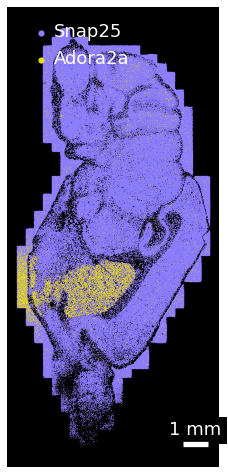

In [4]:
d0.scatter_plot(['Snap25', 'Adora2a'], s=0.01)

# Data manipulation
We see that it would be better if the dataset would be flipped. below the options for this are shown

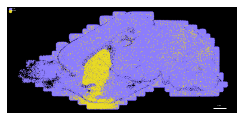

In [6]:
d0.transpose()
d0.scatter_plot(['Snap25', 'Adora2a'], s=0.01, ax_scale_factor=5)

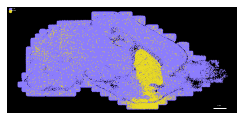

In [7]:
d0.flip_x()
d0.scatter_plot(['Snap25', 'Adora2a'], s=0.01, ax_scale_factor=5)

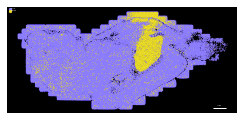

In [8]:
d0.flip_y()
d0.scatter_plot(['Snap25', 'Adora2a'], s=0.01, ax_scale_factor=5)

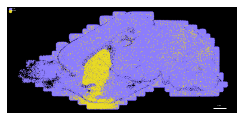

In [9]:
#Reset to best orientation
d0.flip_y()
d0.flip_x()
d0.scatter_plot(['Snap25', 'Adora2a'], s=0.01, ax_scale_factor=5)

# Clip area outside tissue
You can see that the dataset contains detected molecules that actually fall outside of the tissue. These can be clipped off.

In [6]:
#Load the polygon
tissue_polygon = np.genfromtxt(os.path.join(data_path, 'Outside_polygon_Mouse_448.csv'), delimiter=',')[1:, 1:]

In [7]:
#Reload the data but without the molecules outside the polygon.
#This time the X and Y labels are also properly given so that you do not need to transpose the data.
d = dataset.Dataset(file_name,
                    x_label = 'c_px_global_stitched',
                    y_label = 'r_px_global_stitched',
                    gene_label = 'decoded_genes',
                    pixel_size = '0.18 micrometer',
                    color_input = color_dictionary,
                    exclude_genes = ['Control1', 'Control2', 'Control3', 'Control4', 'Control5', 'Control6', 'Control7', 'Control8', 'Cre'],
                    polygon = tissue_polygon,
                    verbose = True,
                    reparse = True)

100%|█████████████████████████████████████████| 440/440 [00:05<00:00, 83.12it/s]


    Loaded: Mouse_448_example_data


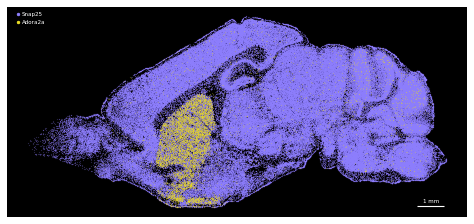

In [8]:
d.scatter_plot(['Snap25', 'Adora2a'], s=0.01)

# FISHscale attributes
The FISHscale object stores some usefull attributes that can be used for analysis. See examples below

In [30]:
print('Full path to the file ', d.filename)
print('Folder where the file is located ', d.dataset_folder)
print('Name of the dataset ', d.dataset_name)
print('Folder where the parsed data and FISHscale metadata can be found ', d.FISHscale_data_folder, '\n\n') 

Full path to the file  /home/lars/storage/Documents/FISHscale/Example_data/Mouse_448_example_data.parquet
Folder where the file is located  /home/lars/storage/Documents/FISHscale/Example_data
Name of the dataset  Mouse_448_example_data
Folder where the parsed data and FISHscale metadata can be found  /home/lars/storage/Documents/FISHscale/Example_data/Mouse_448_example_data_FISHscale_Data 




In [31]:
#Dataset spatial metadata
print('x min ', d.x_min)
print('x max ', d.x_max)
print('x extent ', d.x_extent)
print('y min ', d.y_min)
print('y max ', d.y_max)
print('y extent ', d.y_extent)
print('z coordinate ', d.z)
print('x offset ', d.x_offset)
print('y offset ', d.y_offset)
print('z offset ', d.z_offset)
print('xy center ', d.xy_center)
print('area of one pixel ', d.pixel_area)
print('size of one pixel ', d.pixel_size)
print('unit scale ', d.unit_scale, '\n\n')

x min  -332.09999999999997
x max  15898.93484187374
x extent  16231.034841873741
y min  17.25564078614101
y max  7488.995973217037
y extent  7471.740332430896
z coordinate  0
x offset  0
y offset  0
z offset  0
xy center  (7783.41742093687, 3753.1258070015892)
area of one pixel  0.0324 micrometer ** 2
size of one pixel  0.18 micrometer
unit scale  1 micrometer 




In [32]:
#All genes (showing only the first 10)
d.unique_genes[:10]

array(['2010300C02Rik', 'A830009L08Rik', 'Abi3bp', 'Ache', 'Acta2',
       'Adamts5', 'Adarb2', 'Adcyap1', 'Adora2a', 'Agrp'], dtype='<U13')

In [33]:
#Color dictionary with RGB colors for all genes (showing only one gene)
d.color_dict['Aqp4']

(1.0, 0.8136363636363644, 0.5)

In [34]:
#Total number of molecules and columns
d.shape

(8872669, 4)

In [35]:
#Dictionary with numer of molecules per gene (showing only one gene)
d.gene_n_points['Aqp4']

22232

# FISHscale data storage
All data is stored on disk to keep it memory efficient. To acces the data of a gene use the `get_gene()` function

# Visualization

In [36]:
d.get_gene('Aqp4')

x            y
15846     7264.914976  7192.108500
17311     7291.014976  7148.728500
18124     7447.614976  7178.608500
18232     7318.374976  7254.748500
18259     7274.994976  7189.228500
...               ...          ...
11304876  7783.379066   690.075195
11305131  7894.799066   685.935195
11305166  7856.099066   689.715195
11305176  7806.059066   633.915195
11501447  6233.604338   389.017509

[22232 rows x 2 columns]

# Data visualization
## Interactive visualization
Interactively visualize your data in 3D is a powerfull way to inspect large datasets. Use the second window to select one or multiple genes.
Quick tips:
- Use + and - keys to increase or decrease dot size.  
- Ctrl/Comand and mouse to move the dataset.
- Key "r" to reset the view.
- Key "h" for all options.  
  
To close the Visualizer, first hit the "Quit Visualizer" button and then close the gene selector pannel.

In [37]:
d.visualize()

Single Dataset
/home/lars/storage/Documents/FISHscale/Example_data/Mouse_448_example_data.parquet
Data loaded


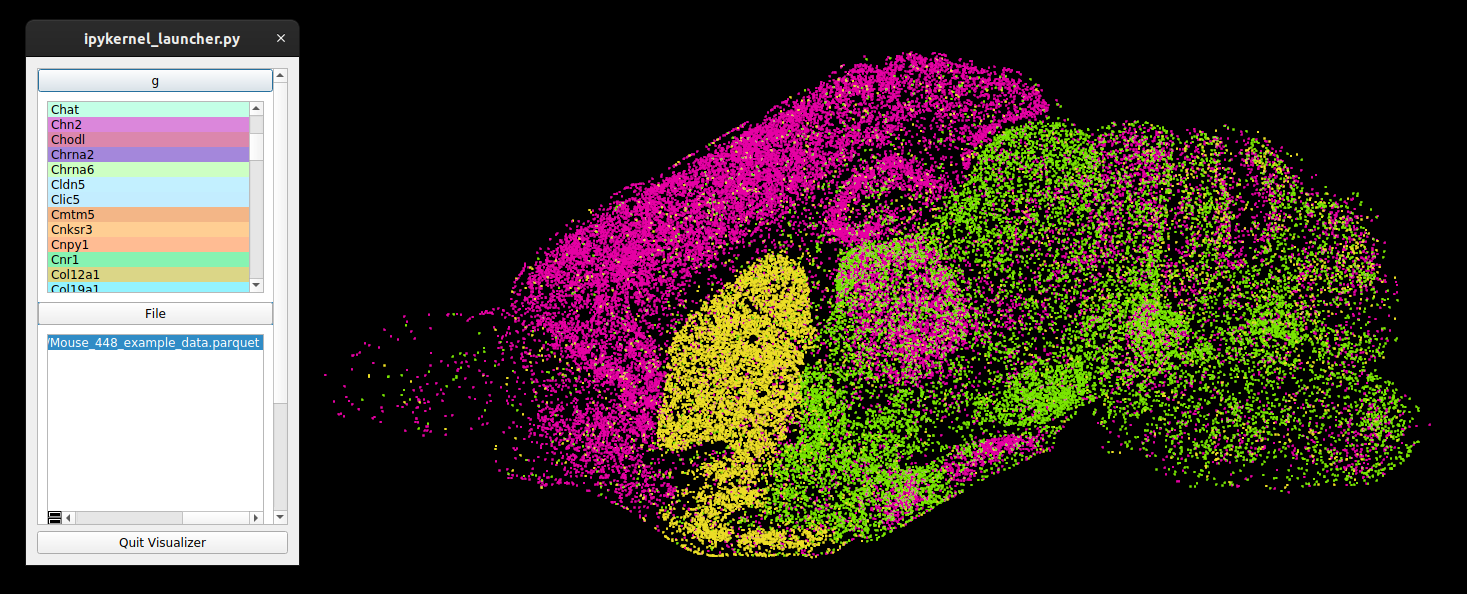

## Plotting and saving figures
Saving plots with large number of dots as vectors creates large figures and takes time. The FISHscale plotting function rasterizes the dots to save space.

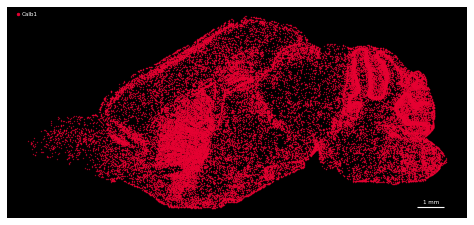

In [38]:
#Plot a single gene
d.scatter_plot('Calb1')

The scale of the plot is defined by the actual size of the data and is controlled by the `ax_scale_factor` parameter.  
The default value is 10, which means that if you save the figure, the data should be 10 times as large as the original dataset. 

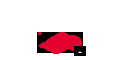

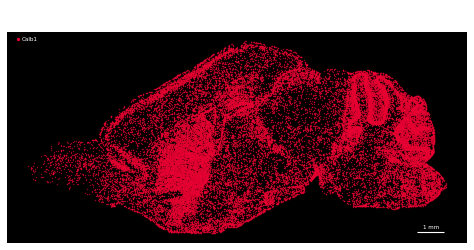

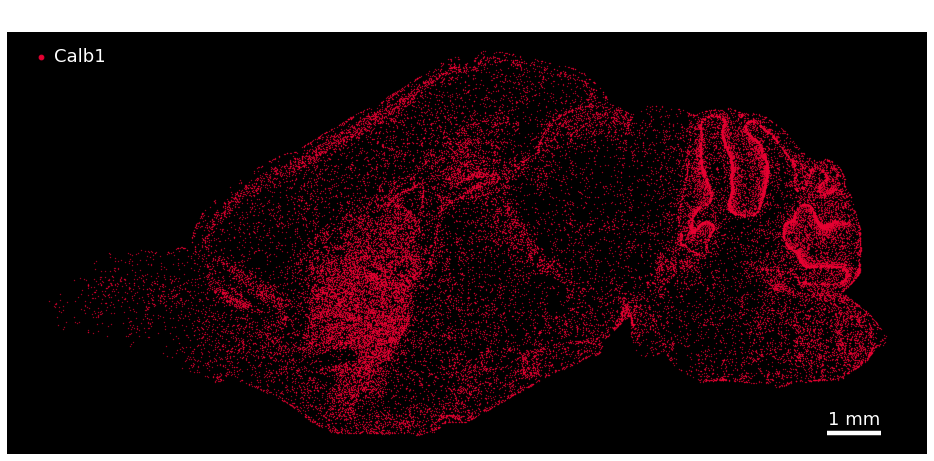

In [39]:
d.scatter_plot('Calb1', ax_scale_factor=1, title='Real size')
d.scatter_plot('Calb1', ax_scale_factor=10, title='10X size')
d.scatter_plot('Calb1', ax_scale_factor=20, title='20X size')

Can not add the legend for more than 15 genes. Please see self.color_dict for gene colors.


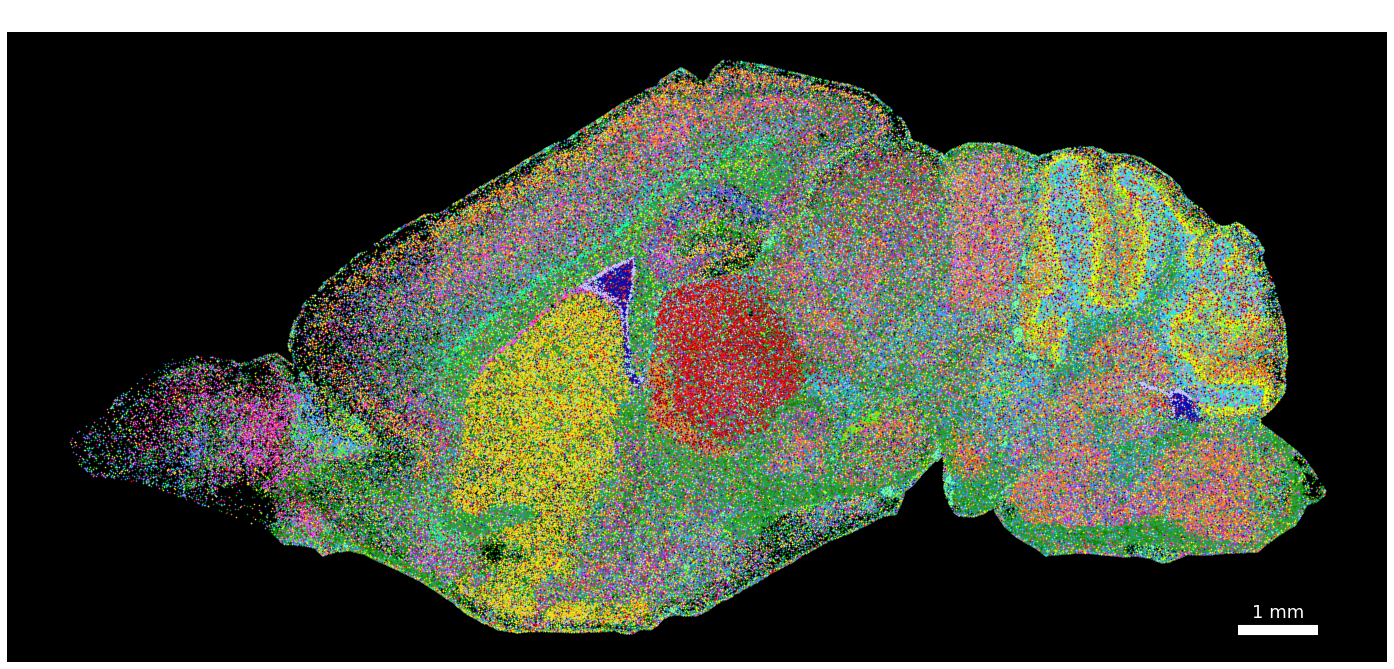

In [40]:
#Plot a list of genes in the given order (Remake of figure 1)
selected_genes = ['Cplx1', 'Mbp', 'Plp1', 'Nefh', 'Stac2', 'Cpne4','Cbln1', 
                  'Calb2', 'Pvalb', 'Gabra6', 'Vim', 'Neurod6', 'Lamp5', 'Rprm',
                  'Cplx3', 'Rasgrf2', 'Sox6', 'Dlx1', 'Th', 'Drd2', 'Adora2a',
                  'Gdf10', 'Dcn', 'Foxj1', 'Kl', 'Lef1', 'Ramp3', 'Synpo2', 
                  'Ccdc153', 'Tagln']
d.scatter_plot(selected_genes, s=0.4, ax_scale_factor=30, title='30 selected genes')

Saving the plot can be done like so:

In [ ]:
d.scatter_plot(selected_genes, 
               s=0.4, 
               ax_scale_factor=30, 
               title='30 selected genes',
               
               save = True,
               save_name = 'Test_plot',
               dpi = 300,
               file_format = '.pdf')        

The legend can be added for up to 15 genes, beyond that you can use the color dictionary to make the legend.

In [41]:
for gene in selected_genes:
    print(f'Gene: {gene :10} RGB color: {d.color_dict[gene]}')

Gene: Cplx1      RGB color: (0.09803921568627451, 0.4549019607843137, 0.6509803921568628)
Gene: Mbp        RGB color: (0.0784313725490196, 0.5411764705882353, 0.00392156862745098)
Gene: Plp1       RGB color: (0.1803921568627451, 0.6196078431372549, 0.24705882352941178)
Gene: Nefh       RGB color: (0.6627450980392157, 0.19607843137254902, 0.8196078431372549)
Gene: Stac2      RGB color: (1.0, 0.38823529411764707, 0.9686274509803922)
Gene: Cpne4      RGB color: (0.8, 0.0, 0.4117647058823529)
Gene: Cbln1      RGB color: (0.09803921568627451, 0.596078431372549, 1.0)
Gene: Calb2      RGB color: (0.25098039215686274, 0.6627450980392157, 1.0)
Gene: Pvalb      RGB color: (1.0, 0.5058823529411764, 0.09803921568627451)
Gene: Gabra6     RGB color: (0.25098039215686274, 0.8509803921568627, 1.0)
Gene: Vim        RGB color: (0.6823529411764706, 1.0, 0.0)
Gene: Neurod6    RGB color: (0.27058823529411763, 0.4823529411764706, 0.8509803921568627)
Gene: Lamp5      RGB color: (1.0, 0.5098039215686274, 0.07

It is also possible to zoom in by using the `view` input

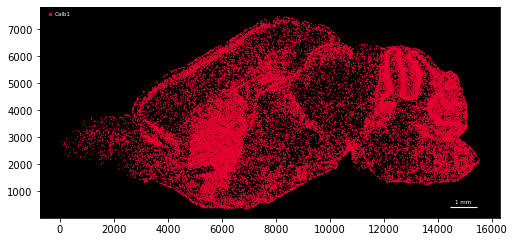

In [42]:
#First it is usefull to see the axes
d.scatter_plot('Calb1', show_axes=True)

Can not add the legend for more than 15 genes. Please see self.color_dict for gene colors.


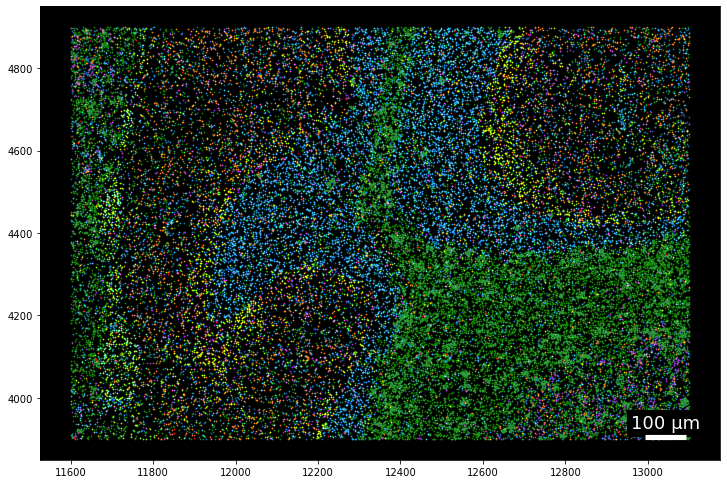

In [43]:
bottom_left = [11600, 3900]
top_right = [13100, 4900]
view = [bottom_left, top_right]

d.scatter_plot(selected_genes, view = view, ax_scale_factor=160, s=0.5, show_axes=True)

You can also plot all genes althogh this might take slightly more time.  
It is also possible to change the color of individual genes

In [44]:
custom_colors = [d.color_dict[gene] for gene in d.unique_genes]
#Set Calb1 to white
custom_colors[np.where(d.unique_genes == 'Calb1')[0][0]] = (1, 1, 1)

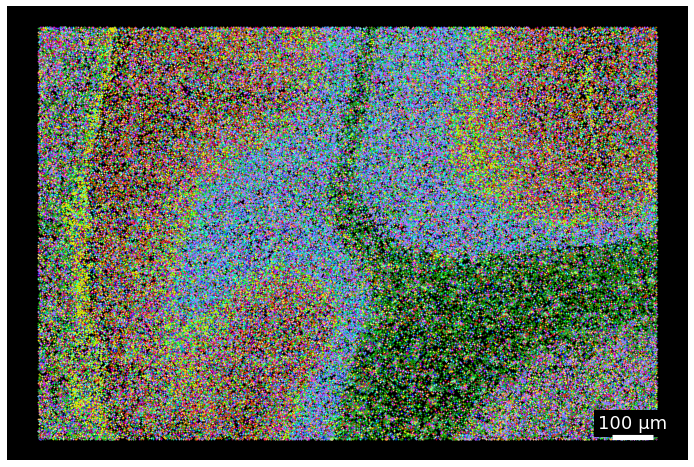

In [45]:
custom_colors = [d.color_dict[gene] for gene in d.unique_genes]
#Set Car8 to white
custom_colors[np.where(d.unique_genes == 'Car8')[0][0]] = (1, 1, 1)


d.scatter_plot(d.unique_genes, view = view, ax_scale_factor=160, s=0.5, colors = custom_colors, show_axes=False, show_legend=False)

It might be usefull to order the genes so that the most spatially defined genes are plot on top

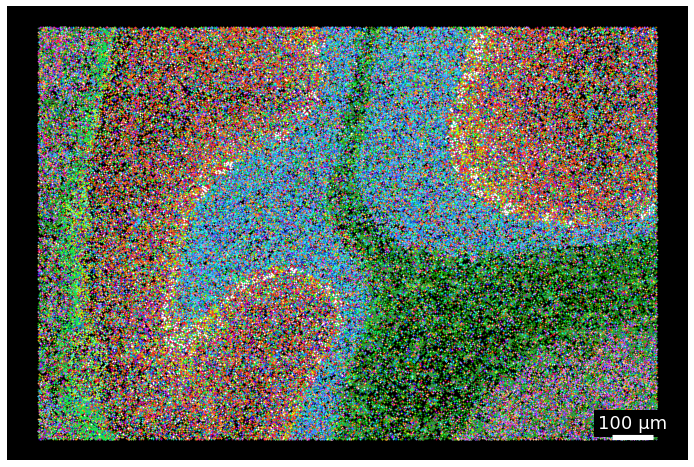

In [46]:
#Sort genes by the Gini coefficient
gene_order = d.sort_genes_by_gini(spacing=200, min_count=10)

#Prepare custom colors in same order as the new gene_order
custom_colors = [d.color_dict[gene] for gene in gene_order]
#Set Car8 to white
custom_colors[np.where(gene_order == 'Car8')[0][0]] = (1, 1, 1)

d.scatter_plot(gene_order, view = view, ax_scale_factor=160, s=0.5, colors = custom_colors, show_axes=False, show_legend=False)

# Hexagonal binning
Bin the data with hexagonal bins.

In [47]:
df_hex, coordinates = d.hexbin_make(spacing=75, min_count=10)
df_hex.head(5)

Mouse_448_example_data_1377  Mouse_448_example_data_1378  \
2010300C02Rik                          0.0                          2.0   
A830009L08Rik                          0.0                          0.0   
Abi3bp                                 0.0                          0.0   
Ache                                   0.0                          1.0   
Acta2                                  0.0                          0.0   

               Mouse_448_example_data_1379  Mouse_448_example_data_1380  \
2010300C02Rik                          5.0                          1.0   
A830009L08Rik                          1.0                          1.0   
Abi3bp                                 1.0                          0.0   
Ache                                   2.0                          1.0   
Acta2                                  0.0                          0.0   

               Mouse_448_example_data_1381  Mouse_448_example_data_1382  \
2010300C02Rik                          2.0                          1.0   
A830009L08Rik                          0.0                          0.0   
Abi3bp                                 0.0                          0.0   
Ache                                   4.0                          1.0   
Acta2                                  0.0                          0.0   

               Mouse_448_example_data_1383  Mouse_448_example_data_1384  \
2010300C02Rik                          3.0                          2.0   
A830009L08Rik                          0.0                          0.0   
Abi3bp                                 0.0                          0.0   
Ache                                   2.0                          0.0   
Acta2                                  1.0                          0.0   

               Mouse_448_example_data_1385  Mouse_448_example_data_1386  ...  \
2010300C02Rik                          5.0                          5.0  ...   
A830009L08Rik                          0.0                          0.0  ...   
Abi3bp                                 0.0                          0.0  ...   
Ache                                   0.0                          2.0  ...   
Acta2                                  0.0                          1.0  ...   

               Mouse_448_example_data_24860  Mouse_448_example_data_25066  \
2010300C02Rik                           0.0                           0.0   
A830009L08Rik                           0.0                           0.0   
Abi3bp                                  0.0                           0.0   
Ache                                    0.0                           0.0   
Acta2                                   0.0                           0.0   

               Mouse_448_example_data_25067  Mouse_448_example_data_25068  \
2010300C02Rik                           1.0                           0.0   
A830009L08Rik                           2.0                           0.0   
Abi3bp                                  0.0                           0.0   
Ache                                    0.0                           0.0   
Acta2                                   0.0                           0.0   

               Mouse_448_example_data_25069  Mouse_448_example_data_25070  \
2010300C02Rik                           0.0                           0.0   
A830009L08Rik                           0.0                           1.0   
Abi3bp                                  0.0                           0.0   
Ache                                    1.0                           1.0   
Acta2                                   1.0                           0.0   

               Mouse_448_example_data_25071  Mouse_448_example_data_25072  \
2010300C02Rik                           0.0                           0.0   
A830009L08Rik                           0.0                           0.0   
Abi3bp                                  0.0                           0.0   
Ache                             

Show the hexagonal bins with the `hexbin_plot()` function

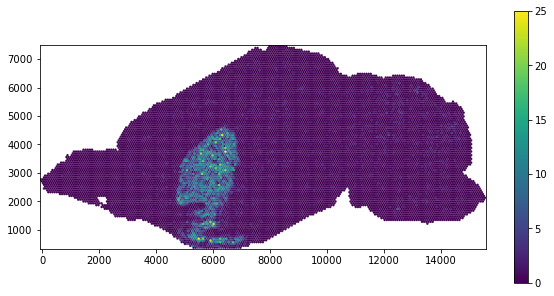

In [48]:
d.hexbin_plot(c=df_hex.loc['Adora2a'], figsize=(10,5))

In [15]:
df_hex, labels, hex_coord, df_mean, df_norm = d.regionalize(spacing=75, 
                                                            min_count=10, 
                                                            n_components=[0,90],                                                        
                                                            clust_dist_threshold=100,
                                                            n_clusters = None,
                                                            clust_neighbor_rings=1)

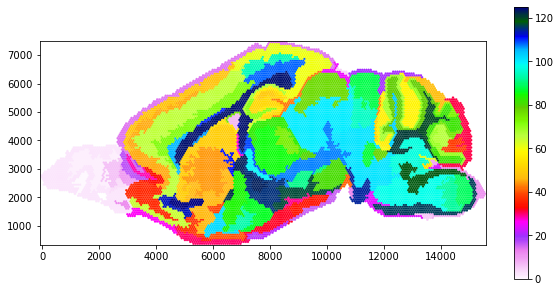

In [16]:
d.hexbin_plot(labels, cm=plt.cm.gist_ncar_r, figsize=(10,5))

# Mix regions
Mix the colors of the regionalization results based on the probability of cluster identity.

Perfect matches: 13537 out of 14112 which is 96% accuracy


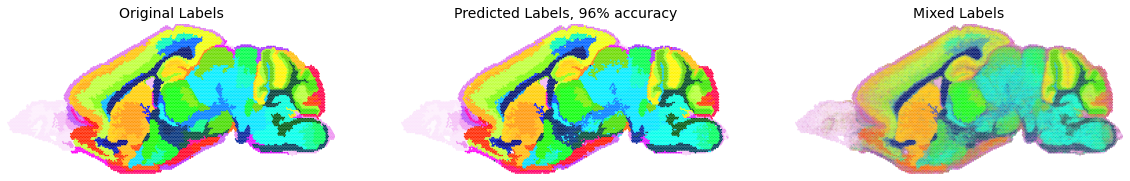

In [17]:
mix_color, predicted_prob, predicted_labels, color_dict = d.regionalization_gradient_make(df_hex, labels, max_depth=14, cm=plt.cm.gist_ncar_r)

(-91.58257906312934, 15583.41742093687, 338.12673224227814, 7492.884408180064)

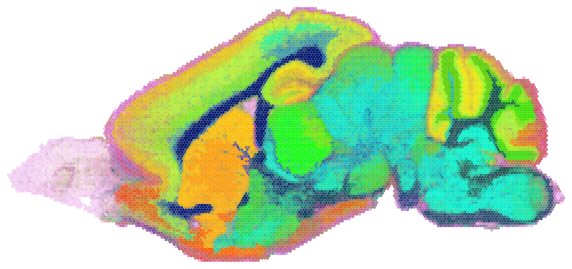

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
    
d.hexbin_plot(mix_color, ax = ax)
plt.axis('off')

# Borders
Calculating borders can take some time, For this example the parameters are less dense than used for the paper.  
Parameters used in the paper: `d.boundaries_make(bin_size=50, n_angles=12, radius=250, normalize=True, normalization_mode='log')`

In [8]:
borders, image, grid, grid_filt, filt_grid, shape = d.boundaries_make(bin_size=100, n_angles=6, radius=250, normalize=True, normalization_mode='log')

[########################################] | 100% Completed |  3min 30.8s


/home/lars/storage/Documents/FISHscale/spatial/boundaries.py:252: RuntimeWarning: invalid value encountered in true_divide
  stack = cm_norm * np.nan_to_num((stack / cm_repeat))
/home/lars/storage/Documents/FISHscale/spatial/boundaries.py:253: RuntimeWarning: invalid value encountered in true_divide
  stack_other = cm_norm * np.nan_to_num((stack_other / cm_repeat))


[########################################] | 100% Completed |  6.5s
(75, 163)


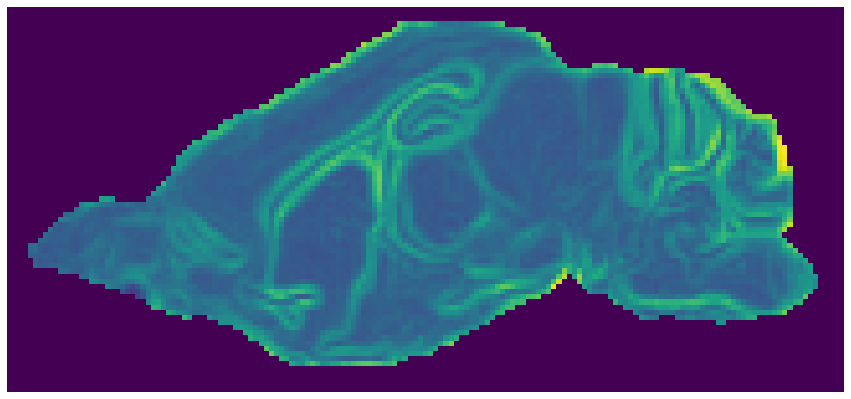

In [13]:
fig, ax = plt.subplots(figsize=(15,10))

plt.imshow(image)
#plt.colorbar(im, cax=cax)
ax.set_aspect('equal')
ax.axis('off')
ax.invert_yaxis();

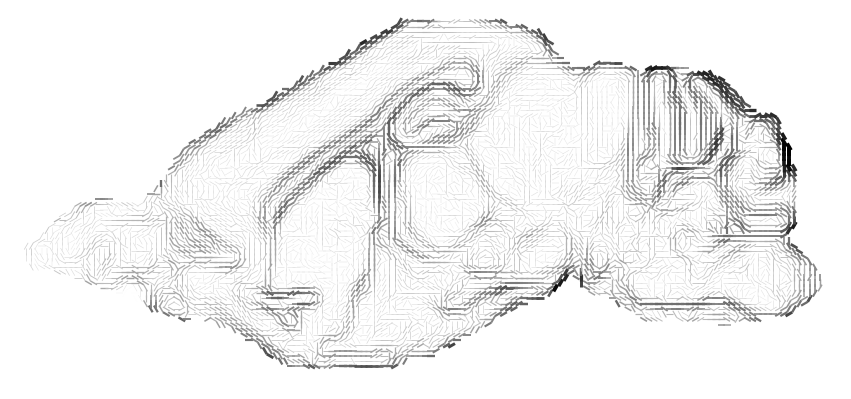

In [21]:
#Make lines at every grid point
lines = [d.bisect(75, a, g) for a,g in zip(borders[:,1], grid_filt)]
xy= np.array(lines)

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(d.x_min, d.x_max)
ax.set_ylim(d.y_min, d.y_max)

#Get the magnitude of the border at every position
values = borders[:,0]
values = values - values.min()
values = values / values.max()
values_inv = 1-values

#Color lines by magnitude
colors = plt.cm.gray(values_inv)

line_segments = LineCollection(xy, linestyle='solid', colors=colors, linewidths=values*4) 
ax.add_collection(line_segments)
ax.set_aspect('equal')
ax.axison=False

# Density
Calculate the density of set of points along a line. You can either calculate the raw counts or the KDE

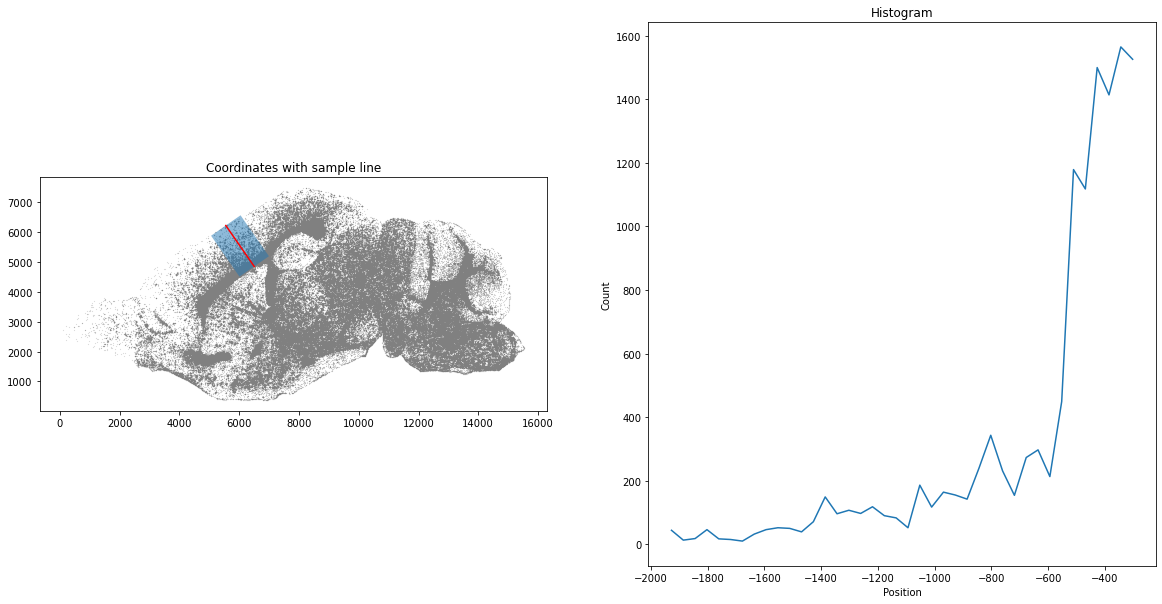

In [22]:
#Raw counts
plp1 = d.get_gene('Plp1').to_numpy()
histogram, bin_edges = d.density_count(plp1, [5550, 6220, 6500, 4850], width=1200, nbins=40, plot=True, s=0.01)

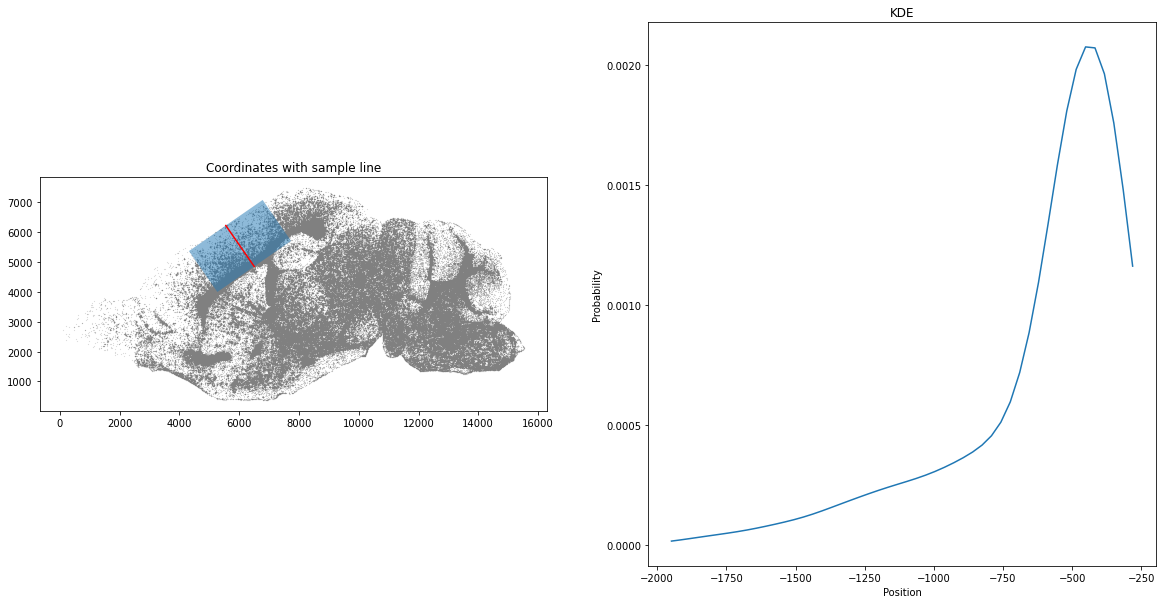

In [23]:
probability, sample_space, filt, y_coords = d.density_probability(plp1, [5550, 6220, 6500, 4850], width=3000, kernel='gaussian',
                                                                  bandwidth=100, plot=True, s=0.01)

# Gene correlation
FISHscale has multiple options to calculate correlations between expression patterns. The fastest way is to correlate the gene counts of the hexagonal binning.

In [24]:
gene_correlation = d.gene_corr_hex(df_hex, method='spearman')

In [25]:
gene_correlation.head(5)

2010300C02Rik  A830009L08Rik    Abi3bp      Ache     Acta2  \
2010300C02Rik       1.000000       0.136011  0.136585  0.024921  0.016277   
A830009L08Rik       0.136011       1.000000  0.092248  0.325184  0.165042   
Abi3bp              0.136585       0.092248  1.000000  0.069546  0.061628   
Ache                0.024921       0.325184  0.069546  1.000000  0.171251   
Acta2               0.016277       0.165042  0.061628  0.171251  1.000000   

                Adamts5    Adarb2   Adcyap1   Adora2a      Agrp  ...  \
2010300C02Rik  0.061971  0.065991  0.126895  0.364337  0.113136  ...   
A830009L08Rik  0.203490  0.295628  0.140335  0.085479  0.081489  ...   
Abi3bp         0.061814  0.088504  0.078696  0.063796  0.036080  ...   
Ache           0.186479  0.235875  0.151530  0.077166  0.061667  ...   
Acta2          0.163478  0.159134  0.123096  0.041599  0.038195  ...   

                   Urah       Vim       Vip     Vipr1     Vipr2       Vtn  \
2010300C02Rik  0.070362 -0.027443  0.076387  0.196533  0.287433  0.120758   
A830009L08Rik  0.065642  0.021930  0.102966  0.183467  0.205930  0.161659   
Abi3bp         0.039463  0.065968  0.044379  0.096823  0.098407  0.081405   
Ache           0.052535  0.072289  0.079841  0.125268  0.117427  0.176993   
Acta2          0.059762  0.163595  0.116700  0.107492  0.066834  0.114289   

                   Wfs1    Yjefn3      Zic1     Zmat4  
2010300C02Rik  0.271568  0.110733 -0.113090  0.064633  
A830009L08Rik  0.162047  0.147848  0.202106  0.214954  
Abi3bp         0.067595  0.030306  0.066988  0.053216  
Ache           0.189143  0.135864  0.245590  0.176146  
Acta2          0.069994  0.043793  0.232274  0.051849  

[5 rows x 440 columns]

Another way is to calculate the Coordinate Based Colocalization from: https://doi.org/10.1007/s00418-011-0880-5  
However this method is very very slow for many molecules and many genes

In [78]:
cbc = d.gene_corr_CBC(radius=100)

# Bonefight